**Problem Statement: Student Exam Score Prediction**
In this task, we aim to predict students' final exam scores based on several behavioral and academic factors such as study time, sleep hours, participation, etc.
**Goal**
Build a machine learning model that accurately estimates a student’s exam score based on provided features.
Evaluate the model’s performance using appropriate metrics.
Try out different feature combinations and model types to improve accuracy.

**Model Type**
Linear Regression will be the base model.
Polynomial Regression will also be tested to compare performance.

**Input Features**
The dataset includes several features, such as:

StudyHours: Number of hours the student studied
SleepHours: Sleep duration per night
Attendance: Attendance percentage
Participation: In-class participation level
PreviousScores: Scores from previous tests (if available)

(Exact feature names will depend on the dataset after inspection.)

**Target Variable**
FinalScore: The score the student received in the final exam.

**Import libraries**

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Display Settings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# Load the dataset
df = pd.read_csv('studentPerformanceFactors.csv')  # Make sure the CSV file is in your project folder

# Preview the first few rows
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


**Exploratory Data Analysis (EDA) phase.**

In [3]:
# Check for missing values
df.isnull().sum()


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [4]:
# Shape of the dataset
print("Dataset Shape:", df.shape)

# Info about each column
df.info()


Dataset Shape: (6607, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence        

In [5]:
# Summary statistics for numerical features
df.describe()


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


**handeling the missing values**

In [6]:
#Check the data types of these columns
df[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Teacher_Quality           6529 non-null   object
 1   Parental_Education_Level  6517 non-null   object
 2   Distance_from_Home        6540 non-null   object
dtypes: object(3)
memory usage: 155.0+ KB


In [8]:
df['Teacher_Quality'].unique()

array(['Medium', 'High', 'Low', nan], dtype=object)

In [9]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)


In [10]:
df['Parental_Education_Level'].unique()

array(['High School', 'College', 'Postgraduate', nan], dtype=object)

In [11]:
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)

In [12]:
df['Distance_from_Home'].unique()

array(['Near', 'Moderate', 'Far', nan], dtype=object)

In [13]:
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)


In [14]:
#re-checking the data types of these columns
df[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Teacher_Quality           6607 non-null   object
 1   Parental_Education_Level  6607 non-null   object
 2   Distance_from_Home        6607 non-null   object
dtypes: object(3)
memory usage: 155.0+ KB


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [16]:
print(f"Duplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


**Visualuizations**

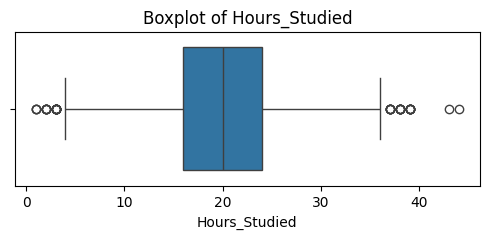

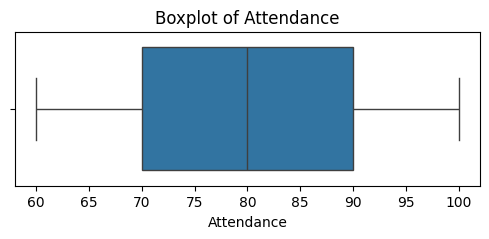

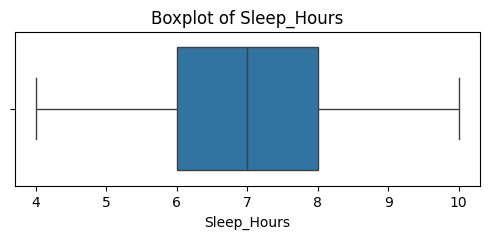

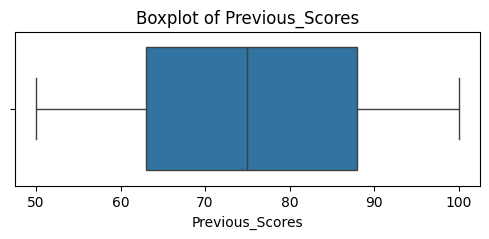

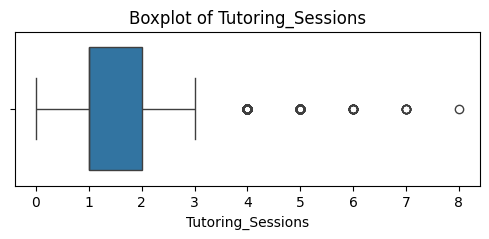

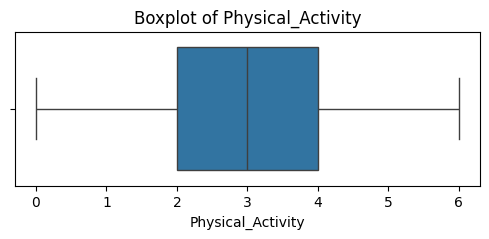

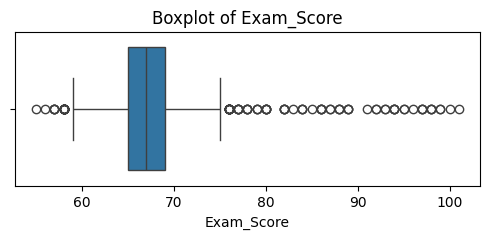

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


**handeling outliers**

In [18]:
def clip_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    print(f"Outliers clipped in '{column}'")


In [19]:
columns_with_outliers = ['Exam_Score', 'Tutoring_Sessions', 'Hours_Studied']


In [20]:
for col in columns_with_outliers:
    clip_outliers_iqr(df, col)


Outliers clipped in 'Exam_Score'
Outliers clipped in 'Tutoring_Sessions'
Outliers clipped in 'Hours_Studied'


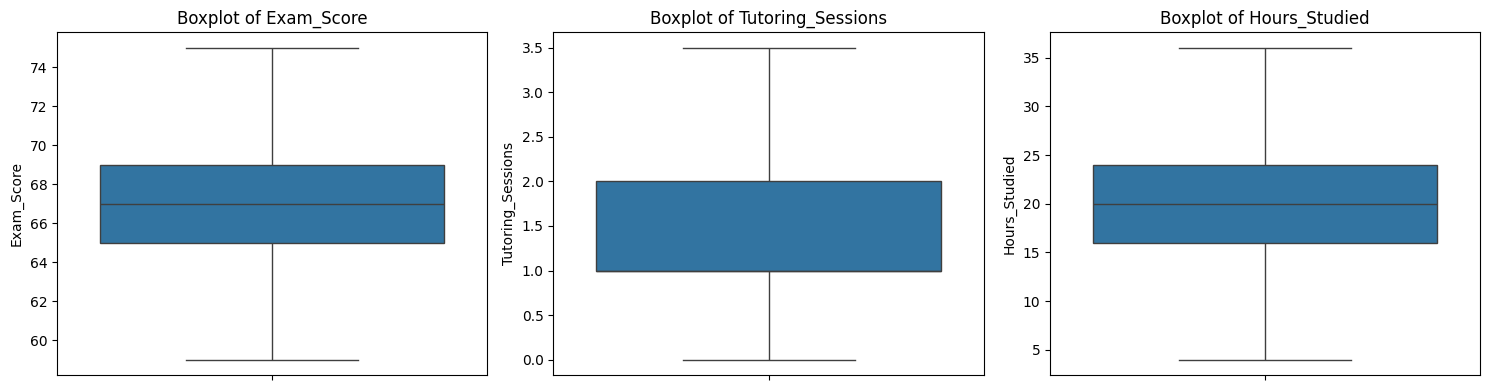

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.figure(figsize=(15, 4))

# Loop through each column and plot
for i, col in enumerate(['Exam_Score', 'Tutoring_Sessions', 'Hours_Studied']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


**Numeric Features Visualizations**

In [22]:
# List of numerical columns 
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

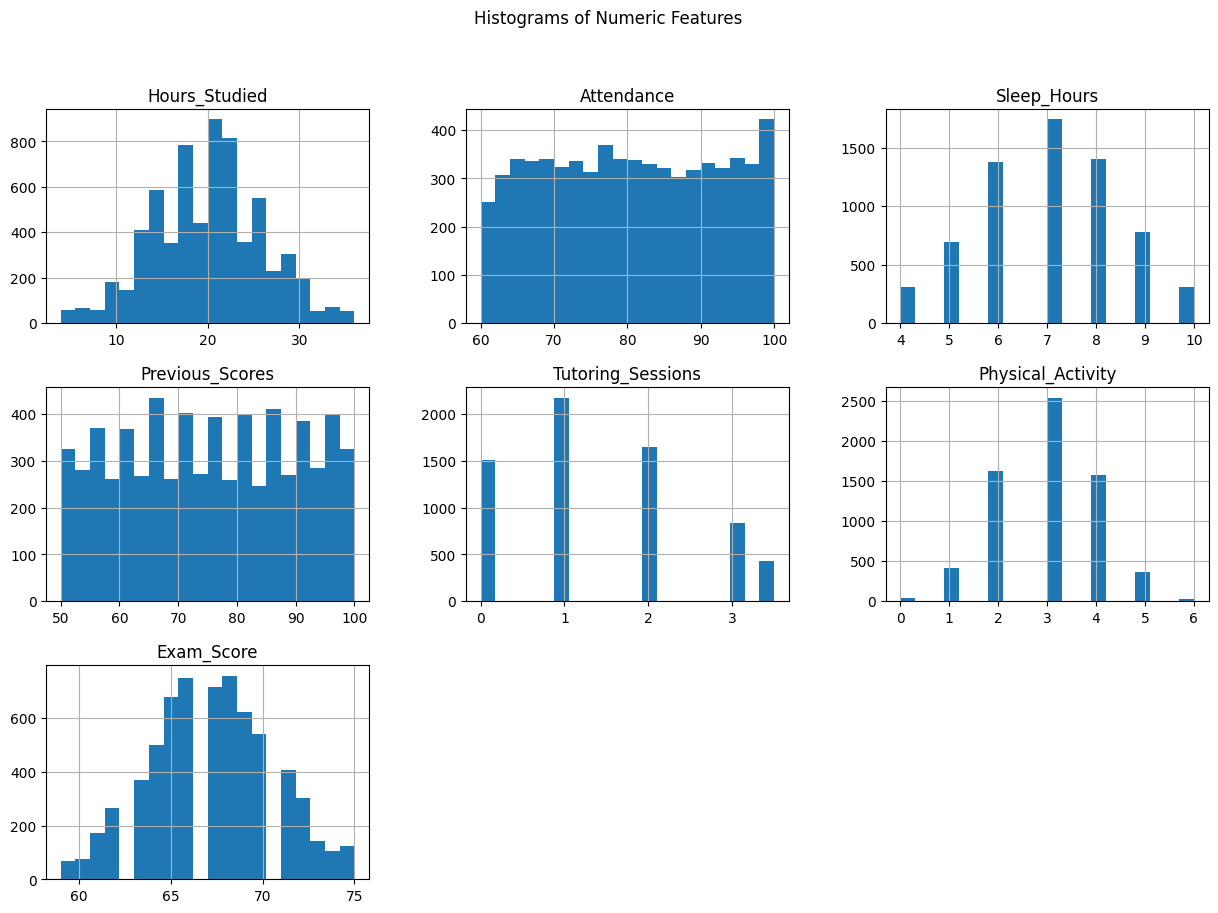

In [23]:
# Histograms for numeric columns
df[numeric_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Numeric Features')
plt.show()

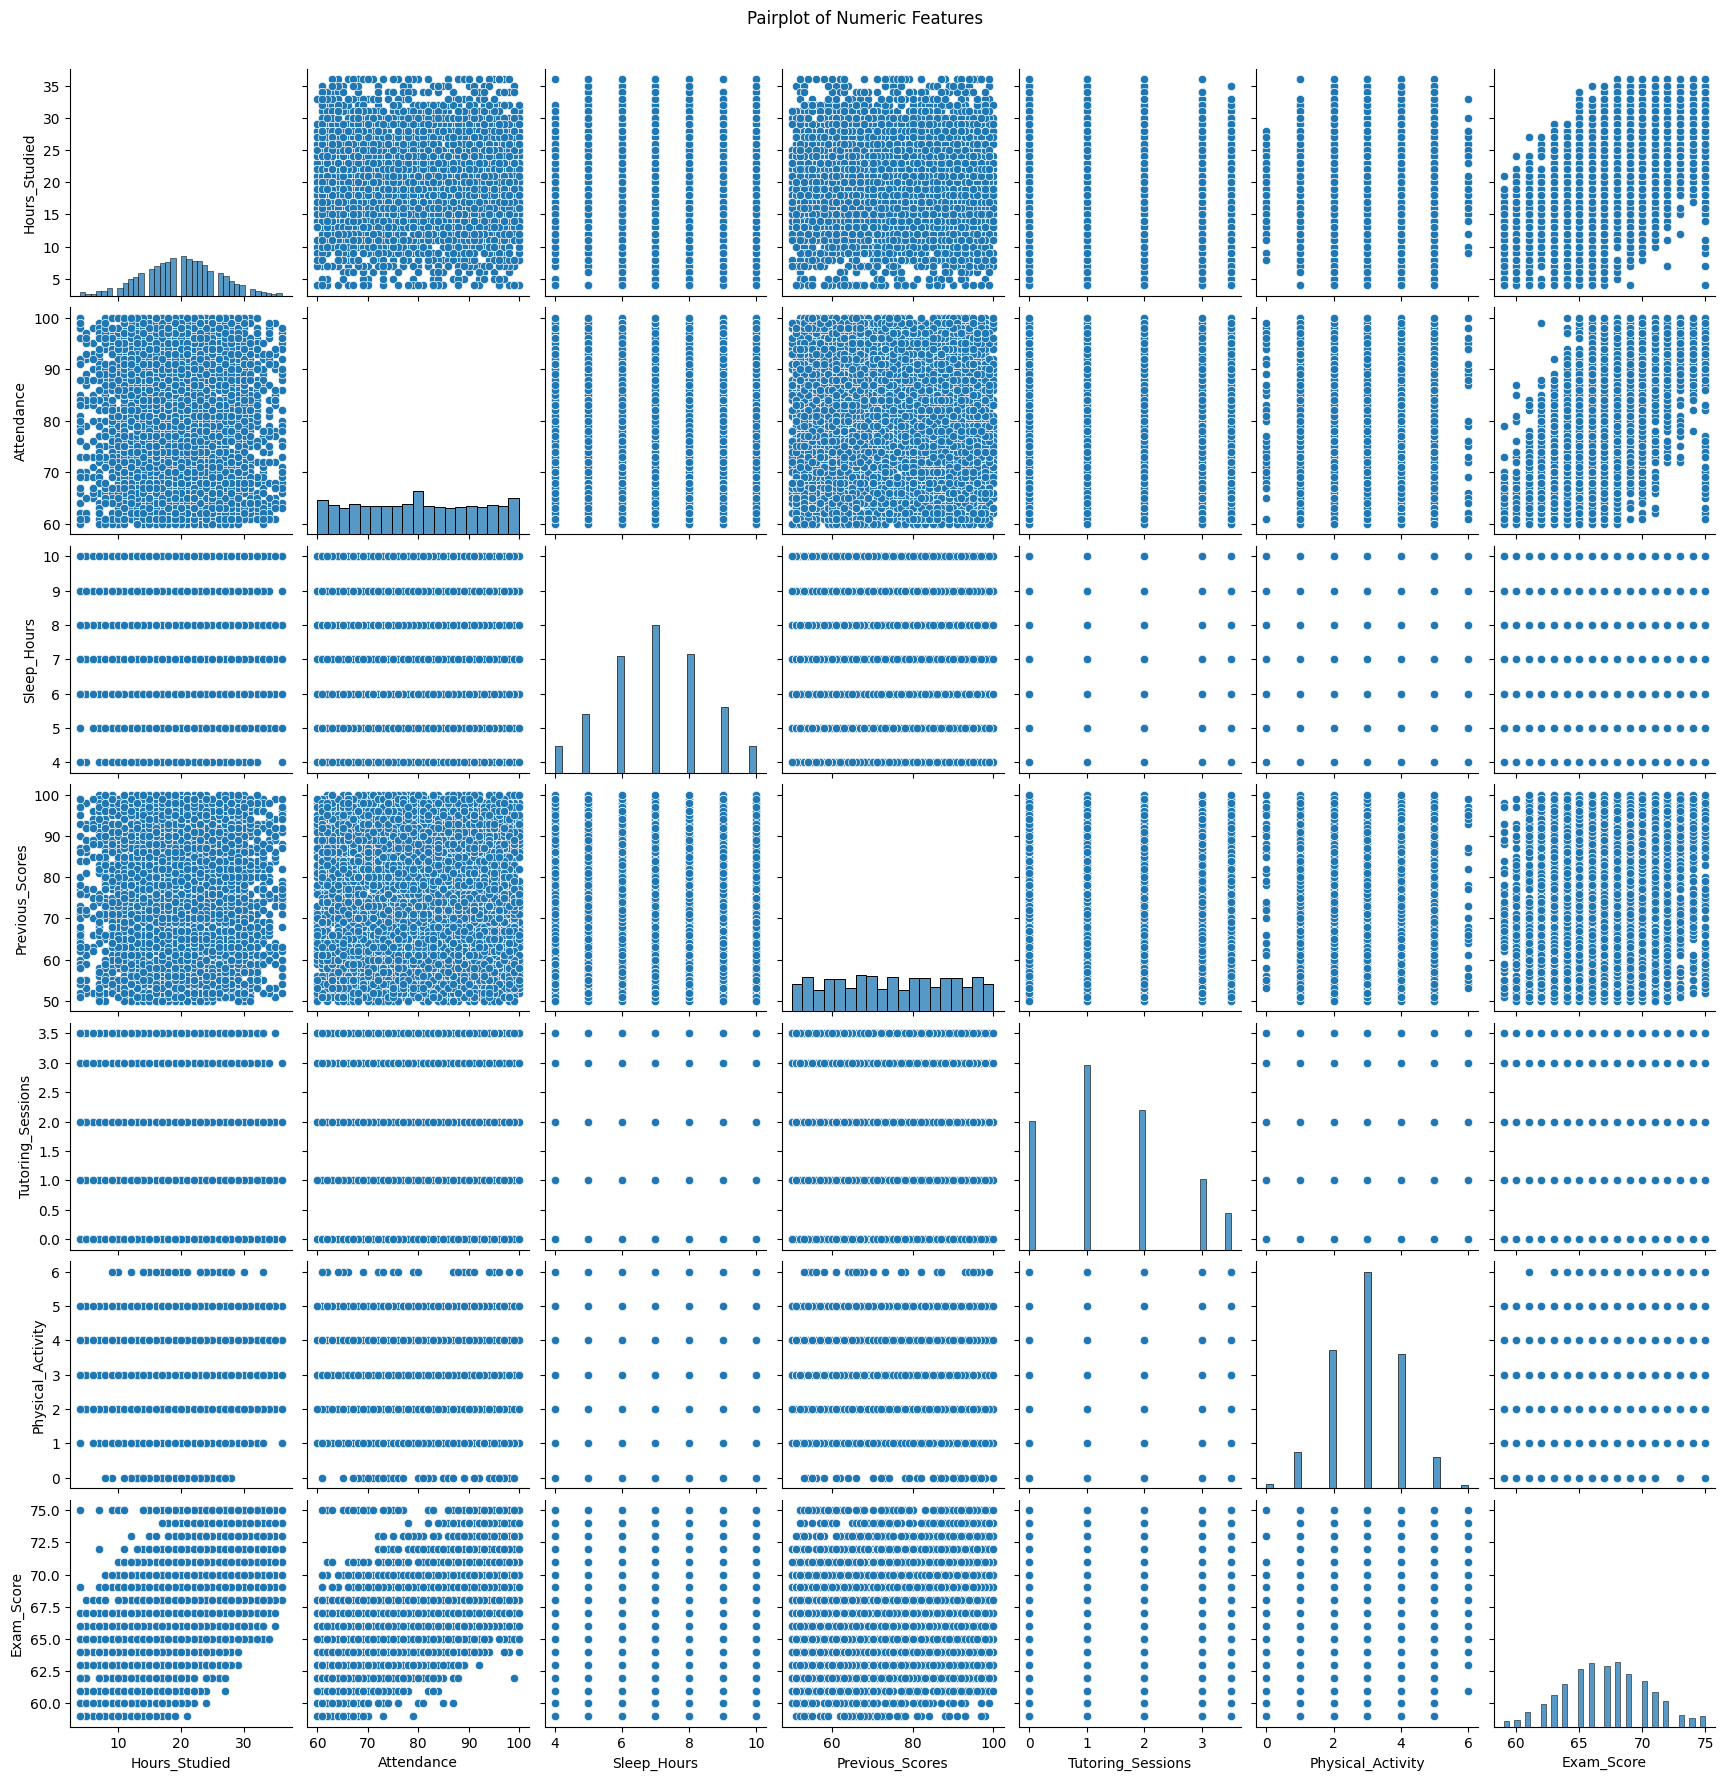

In [24]:
# Pairplot to see relationships
import seaborn as sns
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

**Categorical Features**

In [25]:
# Categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

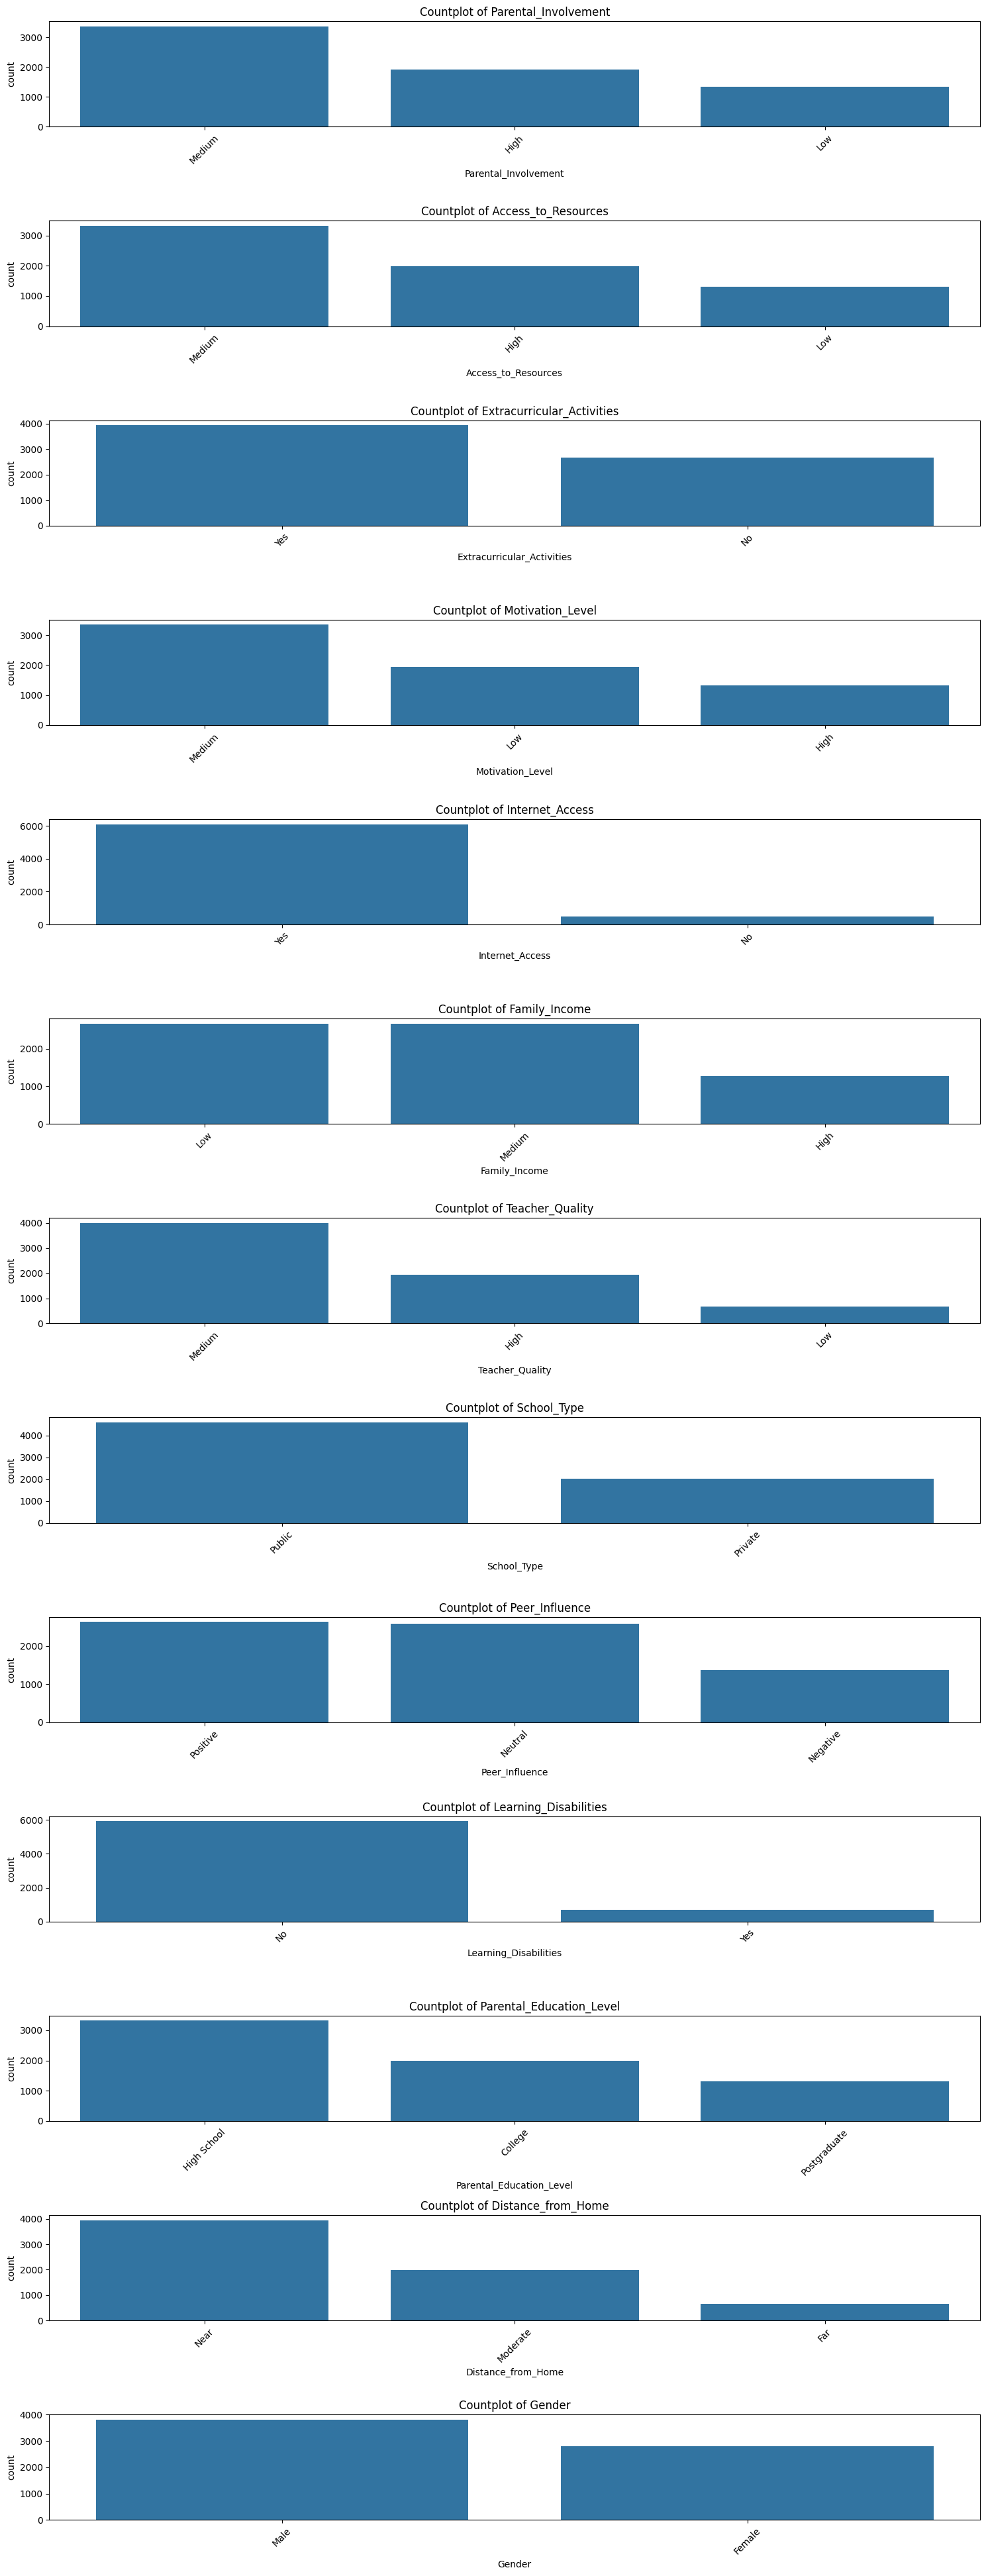

In [26]:
# Count plots for categorical features
plt.figure(figsize=(15, len(categorical_cols)*3))
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols), 1, i+1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

**Encode Categorical Features**

In [27]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", categorical_cols)


Categorical Columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [28]:
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())



--- Parental_Involvement ---
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

--- Access_to_Resources ---
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64

--- Extracurricular_Activities ---
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64

--- Motivation_Level ---
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64

--- Internet_Access ---
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64

--- Family_Income ---
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64

--- Teacher_Quality ---
Teacher_Quality
Medium    4003
High      1947
Low        657
Name: count, dtype: int64

--- School_Type ---
School_Type
Public     4598
Private    2009
Name: count, dtype: int64

--- Peer_Influence ---
Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64

--- Learning

In [29]:
df['Parental_Involvement'] = df['Parental_Involvement'].map({
    'Low': 0,
    'Medium': 1,
    'High': 2
})


In [30]:
df['Access_to_Resources'] = df['Access_to_Resources'].map({
    'Low': 0,
    'Medium': 1,
    'High': 2
})


In [31]:
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({
    'No': 0,
    'Yes': 1
})


In [32]:
df['Motivation_Level'] = df['Motivation_Level'].map({
    'Low': 0,
    'Medium': 1,
    'High': 2
})


In [33]:
df['Gender'] = df['Gender'].map({
    'Female': 0,
    'Male': 1
})


In [34]:
# Show columns with object or category dtype
df.select_dtypes(include=['object', 'category']).columns


Index(['Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home'],
      dtype='object')

In [35]:
# Binary mapping
binary_map = {'Yes': 1, 'No': 0}
df['Internet_Access'] = df['Internet_Access'].map(binary_map)
df['Learning_Disabilities'] = df['Learning_Disabilities'].map(binary_map)

# Ordinal encoding
income_map = {'Low': 0, 'Medium': 1, 'High': 2}
quality_map = {'Low': 0, 'Medium': 1, 'High': 2}
edu_map = {'None': 0, 'Primary': 1, 'Secondary': 2, 'Tertiary': 3}
distance_map = {'Far': 0, 'Moderate': 1, 'Near': 2}

df['Family_Income'] = df['Family_Income'].map(income_map)
df['Teacher_Quality'] = df['Teacher_Quality'].map(quality_map)
df['Parental_Education_Level'] = df['Parental_Education_Level'].map(edu_map)
df['Distance_from_Home'] = df['Distance_from_Home'].map(distance_map)

# One-hot encoding for nominal features
df = pd.get_dummies(df, columns=['School_Type', 'Peer_Influence'], drop_first=True)


In [36]:
df.select_dtypes(include=['object', 'category']).columns

Index([], dtype='object')

**Noe with the splitting and scaling stage**

In [38]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   int64  
 3   Access_to_Resources         6607 non-null   int64  
 4   Extracurricular_Activities  6607 non-null   int64  
 5   Sleep_Hours                 6607 non-null   int64  
 6   Previous_Scores             6607 non-null   int64  
 7   Motivation_Level            6607 non-null   int64  
 8   Internet_Access             6607 non-null   int64  
 9   Tutoring_Sessions           6607 non-null   float64
 10  Family_Income               6607 non-null   int64  
 11  Teacher_Quality             6607 non-null   int64  
 12  Physical_Activity           6607 non-null   int64  
 13  Learning_Disabilities       6607 

In [39]:
# 1. Drop useless column
df = df.drop(columns=['Parental_Education_Level'])

# 2. Define features and target
X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [41]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [42]:
#Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Now we Train the Linear Regression Model**

In [43]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
y_pred = model.predict(X_test_scaled)


**Model evaluation** 

In [45]:
# Evaluate the original Linear Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Original Linear Regression Results")
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Save the results for future comparison
results = {}
results["Linear Regression"] = {
    "MSE": mse,
    "R2": r2
}


Original Linear Regression Results
Mean Squared Error: 0.7894649496474917
R-squared Score: 0.9299692216042283


**Polynomial Regression**

In [46]:
#import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [47]:
# Degree of the polynomial (start with 2)
degree = 2

# Create a pipeline that first creates polynomial features, then applies linear regression
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
poly_model.fit(X_train, y_train)

# Predict
poly_predictions = poly_model.predict(X_test)


In [48]:
# Evaluate Polynomial Regression
poly_mse = mean_squared_error(y_test, poly_predictions)
poly_r2 = r2_score(y_test, poly_predictions)

print("Polynomial Regression Results")
print("Mean Squared Error:", poly_mse)
print("R-squared Score:", poly_r2)

# Save the results
results["Polynomial Regression"] = {
    "MSE": poly_mse,
    "R2": poly_r2
}


Polynomial Regression Results
Mean Squared Error: 0.8175062462733828
R-squared Score: 0.9274817725657185


**compare between the original and the poly**

In [49]:
# Create a DataFrame from the results dictionary
comparison_df = pd.DataFrame(results).T  # Transpose to have models as rows
comparison_df

,MSE,R2
Linear Regression,0.789465,0.929969
Polynomial Regression,0.817506,0.927482


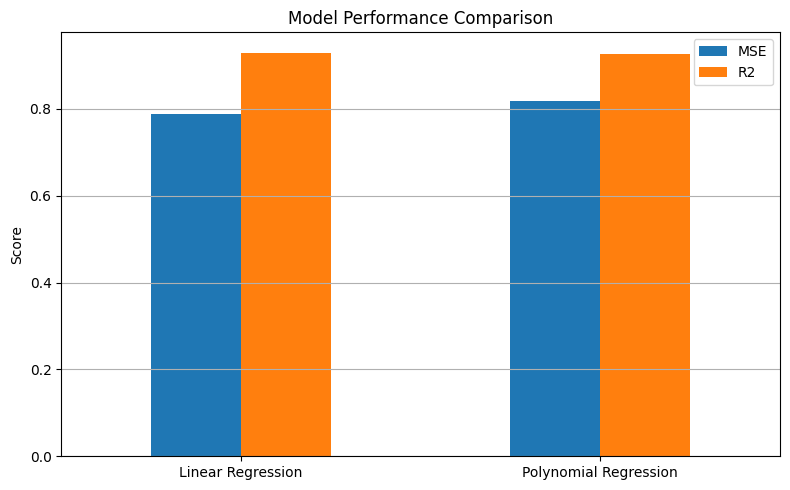

In [50]:
import matplotlib.pyplot as plt

# Bar chart for comparison
comparison_df.plot(kind='bar', figsize=(8, 5))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


**now we will make a modified linear regression model**

In [51]:
# Keep only selected strong predictors
modified_features = ['Hours_Studied', 'Previous_Scores', 'Motivation_Level', 
                     'Parental_Involvement', 'Sleep_Hours', 'Attendance', 'Gender']

X_modified = df[modified_features]
y_modified = df['Exam_Score']


In [52]:
from sklearn.preprocessing import StandardScaler

scaler_mod = StandardScaler()
X_modified_scaled = scaler_mod.fit_transform(X_modified)


In [53]:
from sklearn.model_selection import train_test_split

X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(
    X_modified_scaled, y_modified, test_size=0.2, random_state=42)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linreg_mod = LinearRegression()
linreg_mod.fit(X_train_mod, y_train_mod)

# Predict and evaluate
y_pred_mod = linreg_mod.predict(X_test_mod)

# Metrics
mse_mod = mean_squared_error(y_test_mod, y_pred_mod)
r2_mod = r2_score(y_test_mod, y_pred_mod)

print("Modified Linear Regression")
print("MSE:", mse_mod)
print("R² Score:", r2_mod)


Modified Linear Regression
MSE: 2.188297250740676
R² Score: 0.8058835165524141


In [55]:
results['Modified Linear Regression'] = {
    'MSE': mse_mod,
    'R2': r2_mod
}


In [58]:
results = {
    'Linear Regression': {'MSE': mse, 'R2': r2},
    'Modified Linear Regression': {'MSE': mse_mod, 'R2': r2_mod}
}


In [59]:
import pandas as pd

comparison_df = pd.DataFrame(results).T
print(comparison_df)


                                 MSE        R2
Linear Regression           0.789465  0.929969
Modified Linear Regression  2.188297  0.805884


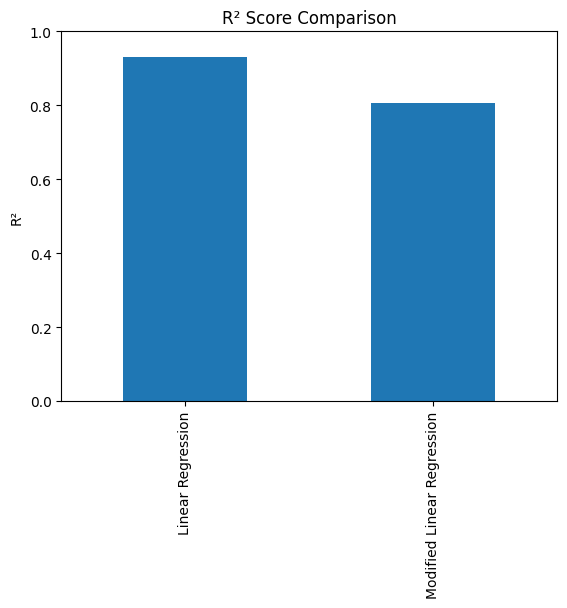

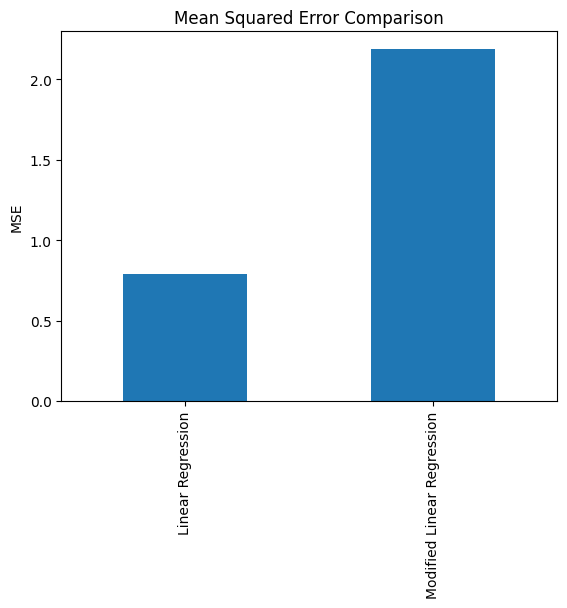

In [60]:
import matplotlib.pyplot as plt

# Plot R2 scores
comparison_df['R2'].plot(kind='bar', title='R² Score Comparison', ylabel='R²', ylim=(0, 1))
plt.show()

# Plot MSE
comparison_df['MSE'].plot(kind='bar', title='Mean Squared Error Comparison', ylabel='MSE')
plt.show()


**Final Conclusion**
The original Linear Regression is the most accurate and efficient model for this dataset.


Polynomial and modified feature regressions both underperform, suggesting that:

The problem is well-modeled by a linear relationship.

Feature richness matters — removing certain inputs weakens the model.